In [12]:
NUM_SAMPLES = 500
DIR = '/Users/alexgaskell/GoogleDrive/Documents/Imperial/Individual_project/datasets/cnn_dm/rouge_tests/'

In [13]:
from bert_score import BERTScorer

# cands = [line.strip() for line in open(DIR + "small.hypo").readlines()[:NUM_SAMPLES]]
# refs = [line.strip() for line in open(DIR + "small.target").readlines()[:NUM_SAMPLES]]

cands = [line.strip() for line in open(DIR + "hf_test.hypo").readlines()[:NUM_SAMPLES]]
refs = [line.strip() for line in open(DIR + "test.target").readlines()[:NUM_SAMPLES]]

scorer = BERTScorer(lang="en", rescale_with_baseline=True)
P, R, F1 = scorer.score(cands, refs)
b_scores = F1.tolist()

In [14]:
from rouge import Rouge, FilesRouge
import files2rouge
import numpy as np

variant='lines'
# hyps = DIR + "small.hypo.tokenized"
# refs = DIR + "small.target.tokenized"
hyps = DIR + "hf_test.hypo"
refs = DIR + "test.target"

if variant == 'official':
    files2rouge.run(hyps, refs) #, saveto='rouge_output.txt')

elif variant == 'files':
    scores = FilesRouge().get_scores(hyps, refs, avg=True)
    print(score)

else:
    cands = [line.strip() for line in open(hyps).readlines()[:NUM_SAMPLES]]
    refs = [line.strip() for line in open(refs).readlines()[:NUM_SAMPLES]]

    scrs = [Rouge().get_scores(c, r) for c,r in zip(cands, refs)]
    scores = np.array([[s[0]['rouge-1']['f'], s[0]['rouge-2']['f'], s[0]['rouge-l']['f']]  for s in scrs])

    # print(np.mean(scores, axis=0))
    # print(scores)
r_scores = scores

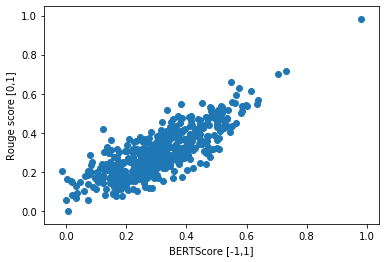

(0.8084743588753239, 9.778288847157587e-117)


In [15]:
import matplotlib.pyplot as plt

r_scores = scores[:, 0]

plt.scatter(b_scores, r_scores)
plt.xlabel('BERTScore [-1,1]')
plt.ylabel('Rouge score [0,1]')
plt.show()

from scipy import stats

p_r = stats.pearsonr(b_scores, r_scores)
print(p_r)

In [10]:
print(F1.argmin(), F1.min())

tensor(39) tensor(-0.0145)


In [11]:
print(np.argmin(r_scores), np.min(r_scores))

72 0.06896551279693515
